In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


In [15]:
data=pd.read_csv(r'C:\Users\RINNY\Downloads\winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [19]:
x=data.drop(columns='quality')
y=data['quality']
x
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
xtrain,ytrain,xtest,ytest=train_test_split(x,y,random_state=20)
print("the xtrain is ",xtrain)
print("the ytrain is ",ytrain)
print("the xtest is ",xtest)
print("the ytest is ",ytest)


the xtrain is        fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
400             6.6             0.735         0.02            7.90      0.122   
35              7.8             0.645         0.00            5.50      0.086   
641             9.5             0.590         0.44            2.30      0.071   
721             8.9             0.480         0.24            2.85      0.094   
1501            7.8             0.820         0.29            4.30      0.083   
...             ...               ...          ...             ...        ...   
924             8.6             0.470         0.27            2.30      0.055   
1247            7.4             0.550         0.19            1.80      0.082   
271            11.5             0.180         0.51            4.00      0.104   
474            10.5             0.280         0.51            1.70      0.080   
1379            7.5             0.570         0.02            2.60      0.077   

      free s

In [ ]:
#bagging method using in KNeighborsClassifier

In [49]:
from sklearn.ensemble import BaggingClassifier
knn_bagging=BaggingClassifier(KNeighborsClassifier(),n_estimators=10,random_state=20,max_samples=1.0,
    max_features=1.0,
    bootstrap=True)
knn_bagging

BaggingClassifier(estimator=KNeighborsClassifier(), random_state=20)

In [51]:
knn_bagging.fit(xtrain,xtest)

BaggingClassifier(estimator=KNeighborsClassifier(), random_state=20)

In [53]:
knn_bagging.estimators_

[KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier(),
 KNeighborsClassifier()]

In [60]:
knn_bagging.score(x,y)

0.6441525953721076

In [62]:
pred=knn_bagging.predict(xtrain)
pred

array([5, 6, 5, ..., 6, 5, 6], dtype=int64)

<Axes: >

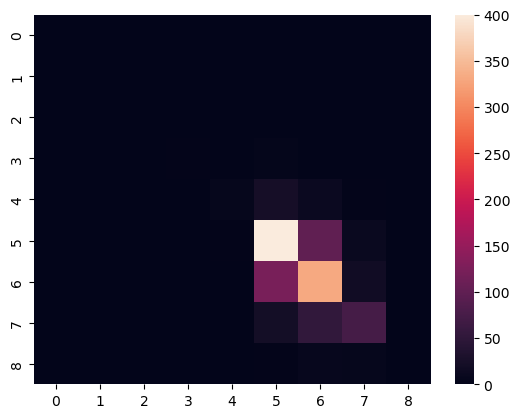

In [67]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf
confusion_matrix=tf.math.confusion_matrix(xtest,predictions=pred)
sns.heatmap(confusion_matrix,fmt='d')

In [ ]:
#bagging method using in descision tree classifier

In [79]:
df=pd.read_csv(r'C:\Users\RINNY\Downloads\homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [99]:
x=df.drop(columns='price')
y=df['price']

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
decisiontree_classifier_bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,random_state=20,max_samples=1.0,max_features=1.0,
                                                    bootstrap=True                           
)

decisiontree_classifier_bagging


BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=20)

In [101]:
decisiontree_classifier_bagging.fit(x,y)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=20)

In [119]:
decisiontree_classifier_bagging.estimators_

[DecisionTreeClassifier(random_state=1636935319),
 DecisionTreeClassifier(random_state=290054577),
 DecisionTreeClassifier(random_state=1264460048),
 DecisionTreeClassifier(random_state=1702690758),
 DecisionTreeClassifier(random_state=2134224868),
 DecisionTreeClassifier(random_state=1498924297),
 DecisionTreeClassifier(random_state=1775443609),
 DecisionTreeClassifier(random_state=1026453278),
 DecisionTreeClassifier(random_state=634422521),
 DecisionTreeClassifier(random_state=1549213110)]

In [109]:
pred=decisiontree_classifier_bagging.predict(x)
pred

array([550000, 565000, 610000, 595000, 760000, 810000], dtype=int64)

[Text(0.3333333333333333, 0.875, 'x[2] <= 11.5\ngini = 0.722\nsamples = 4\nvalue = [2, 1, 1, 0, 2, 0]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 2, 0]'),
 Text(0.5, 0.625, 'x[0] <= 2800.0\ngini = 0.625\nsamples = 3\nvalue = [2, 1, 1, 0, 0, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [2, 0, 0, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 22.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]')]

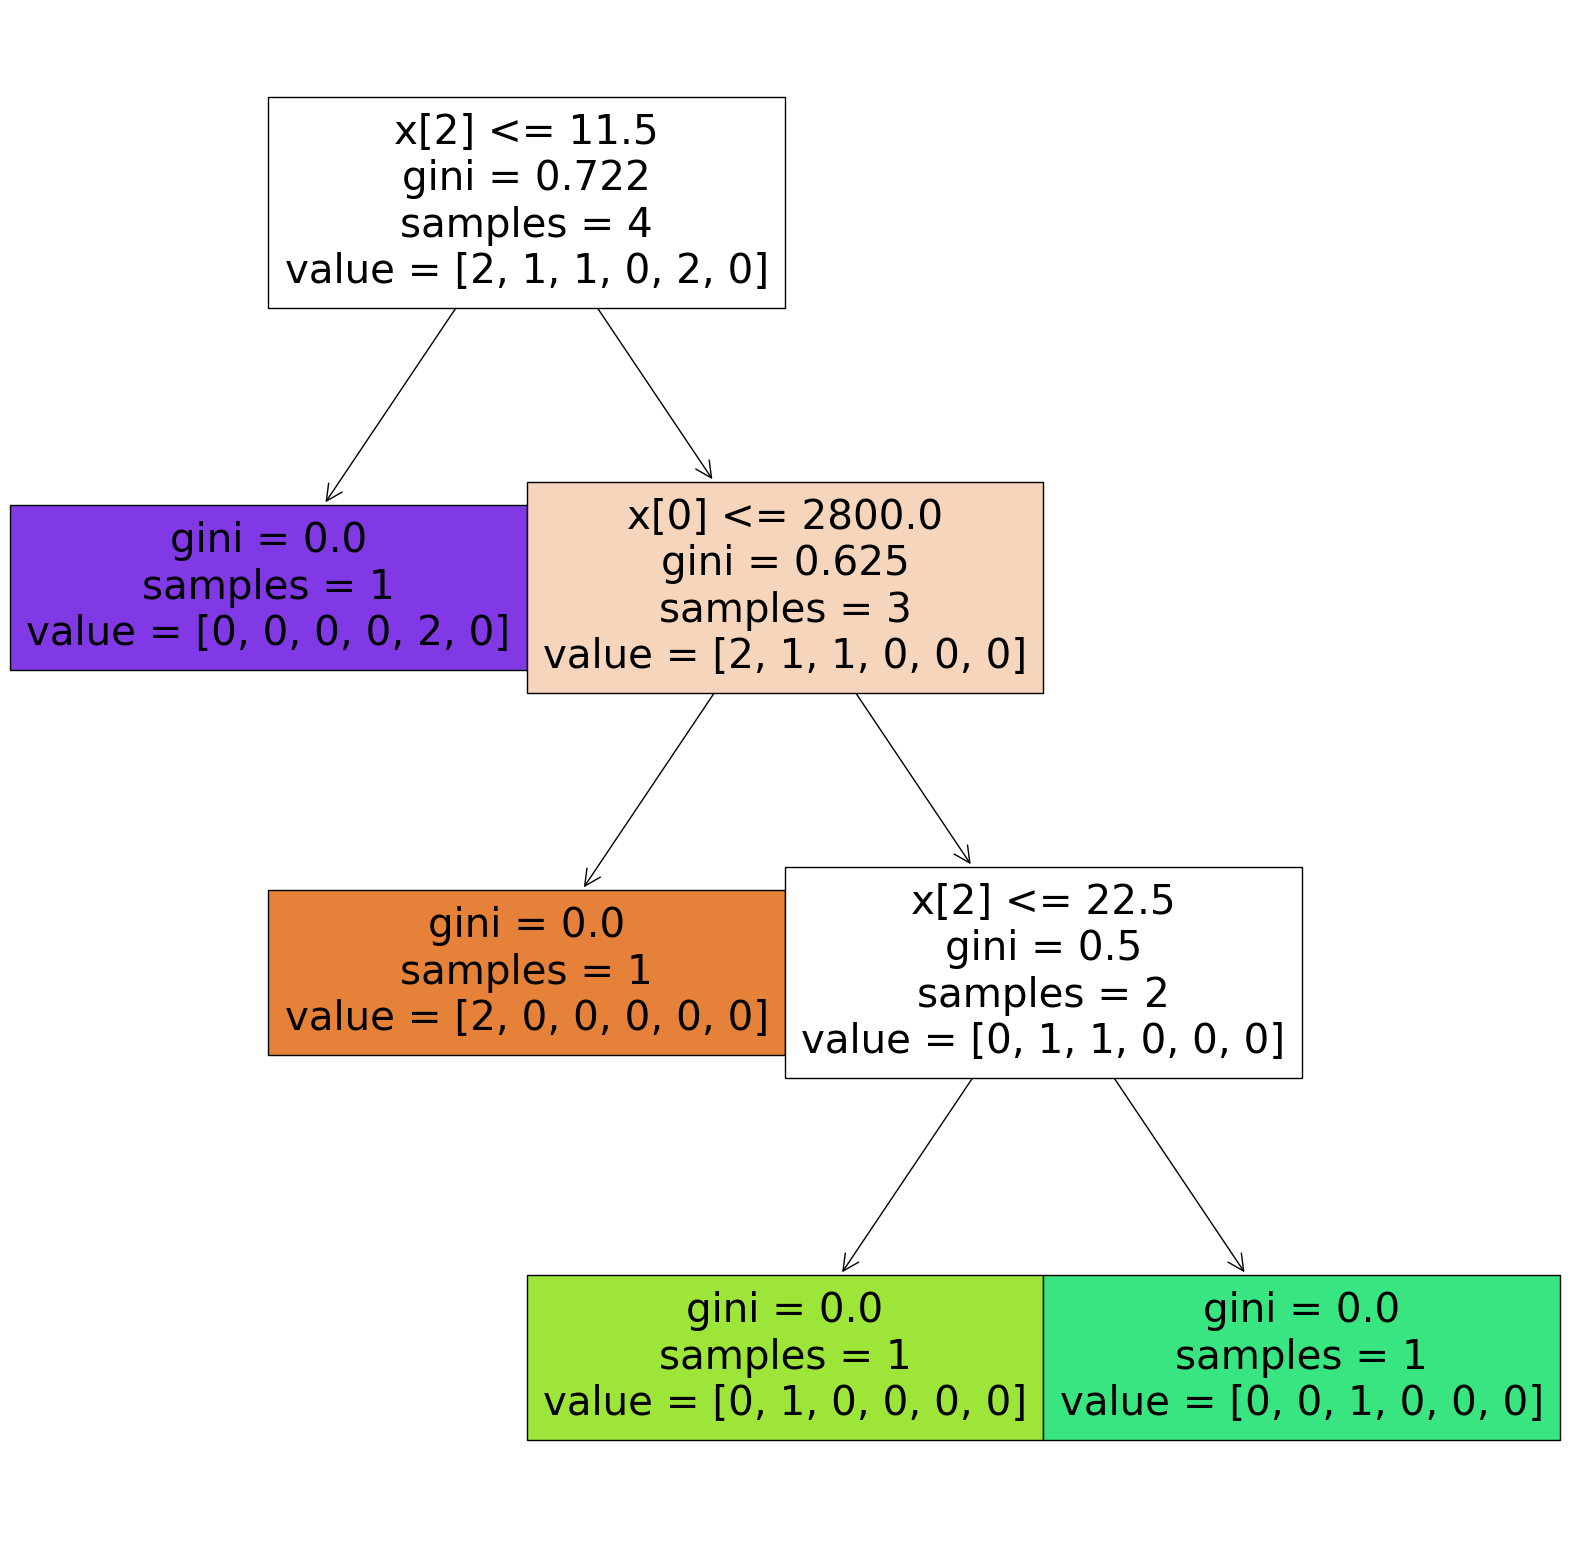

In [131]:
#estimator or model1 
plt.figure(figsize=(20,20))
tree.plot_tree(decisiontree_classifier_bagging.estimators_[0], filled=True)
    

[Text(0.4, 0.875, 'x[0] <= 2900.0\ngini = 0.722\nsamples = 4\nvalue = [2, 0, 1, 1, 2, 0]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [2, 0, 0, 0, 0, 0]'),
 Text(0.6, 0.625, 'x[1] <= 4.0\ngini = 0.625\nsamples = 3\nvalue = [0, 0, 1, 1, 2, 0]'),
 Text(0.4, 0.375, 'x[2] <= 24.0\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0, 0]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 2, 0]')]

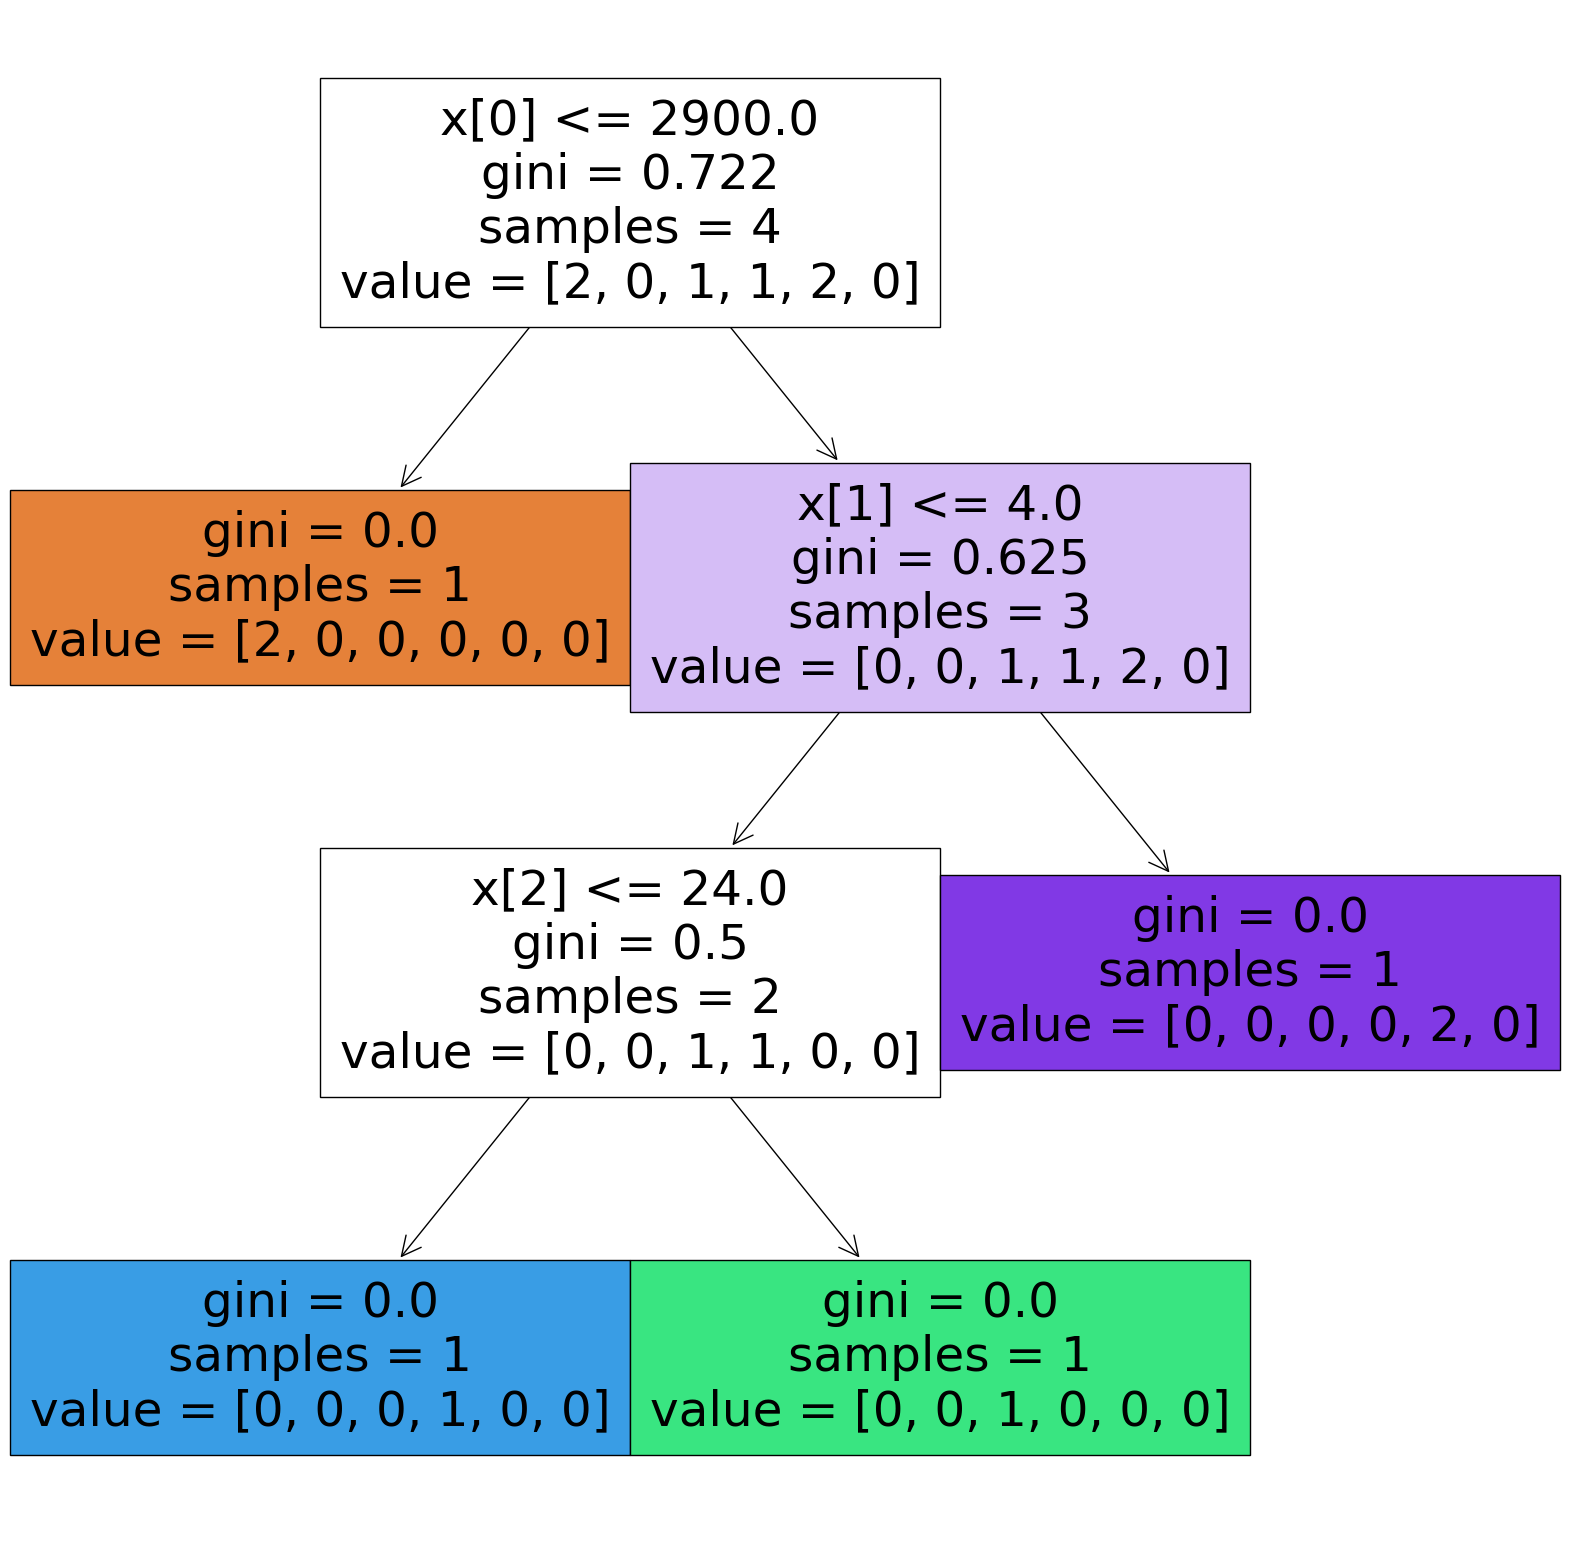

In [133]:
#estimator or model2 
plt.figure(figsize=(20,20))
tree.plot_tree(decisiontree_classifier_bagging.estimators_[2], filled=True)

In [147]:
decisiontree_classifier_bagging.score(x,y)

1.0